In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.7.0


In [2]:
inet_model = inc_net.InceptionV3()

2021-12-17 02:30:04.350296: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n01677366', 'common_iguana', 0.8835052)
('n01693334', 'green_lizard', 0.06051468)
('n01688243', 'frilled_lizard', 0.0074986396)
('n01687978', 'agama', 0.0060893903)
('n01685808', 'whiptail', 0.0021403583)


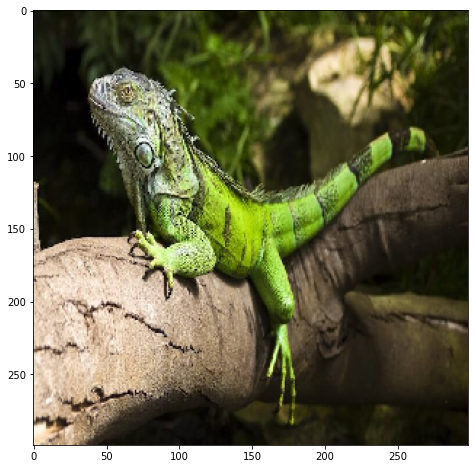

In [4]:
images = transform_img_fn([os.path.join('data','iguana.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.figure(figsize = (8,8))
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [5]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

Segmentation on original image
# of segmentations: 218


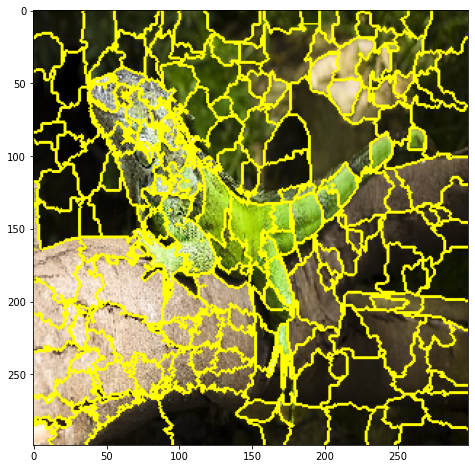

In [10]:
img = images[0]
segs = quickshift(img / 2 + 0.5, kernel_size = 4, max_dist = 6, ratio=0.3, random_seed = 1234)
print("Segmentation on original image")

print("# of segmentations: " + str(len(np.unique(segs))))
plt.figure(figsize = (8,8))
plt.imshow(mark_boundaries(img / 2 + 0.5, segs))

Segmentation on normalized image
# of segmentations: 526


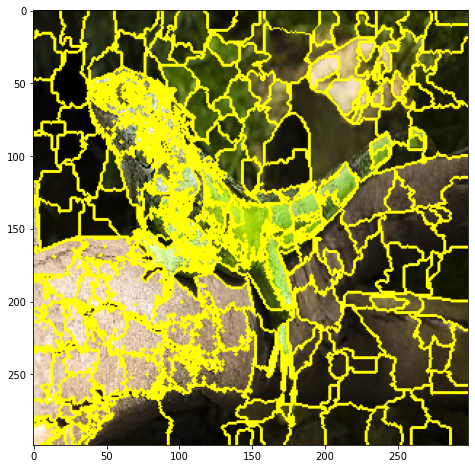

In [11]:
img = images[0]
segs = quickshift(img, kernel_size = 4, max_dist = 6, ratio=0.3, random_seed = 1234)
print("Segmentation on normalized image")
print("# of segmentations: " + str(len(np.unique(segs))))

plt.figure(figsize = (8,8))
plt.imshow(mark_boundaries(img / 2 + 0.5, segs))

Segmentation in lime
# of segmentations: 60


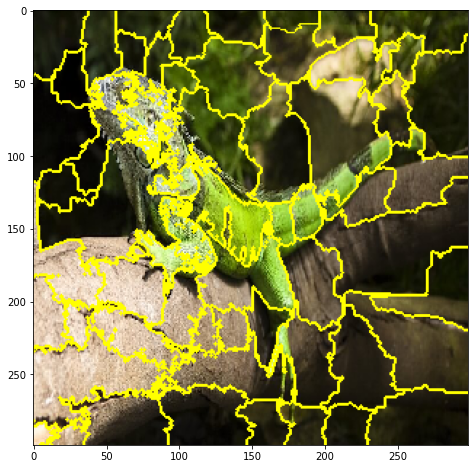

In [13]:
img = images[0]
segs = quickshift(img, kernel_size = 4, max_dist = 200, ratio=0.2, random_seed = 1234)
print("Segmentation in lime")
print("# of segmentations: " + str(len(np.unique(segs))))

plt.figure(figsize = (8,8))
plt.imshow(mark_boundaries(img / 2 + 0.5, segs))
plt.imsave('data/large_segments.png', mark_boundaries(img / 2 + 0.5, segs))